In [2]:
## import some important library
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [5]:
## Read the dataset
df = pd.read_csv(r'C:\Users\Yash Kumar\Documents\bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
## Now we check in price_per_sqft
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [21]:
df.shape

(13200, 7)

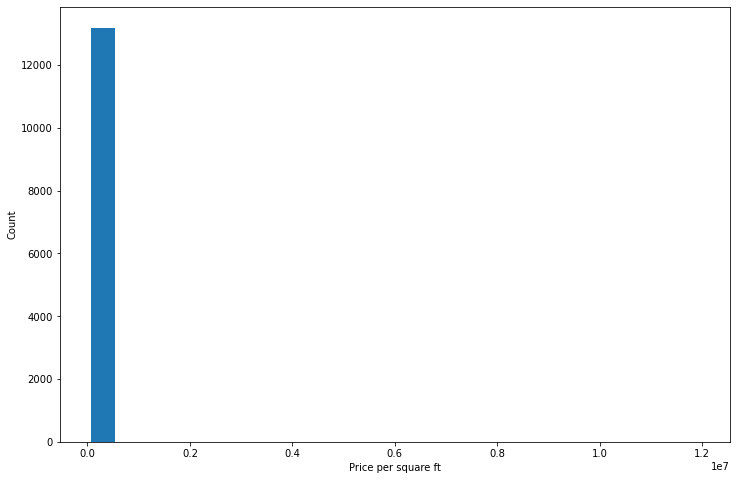

In [7]:
### plot the hist diagram
plt.hist(df.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()


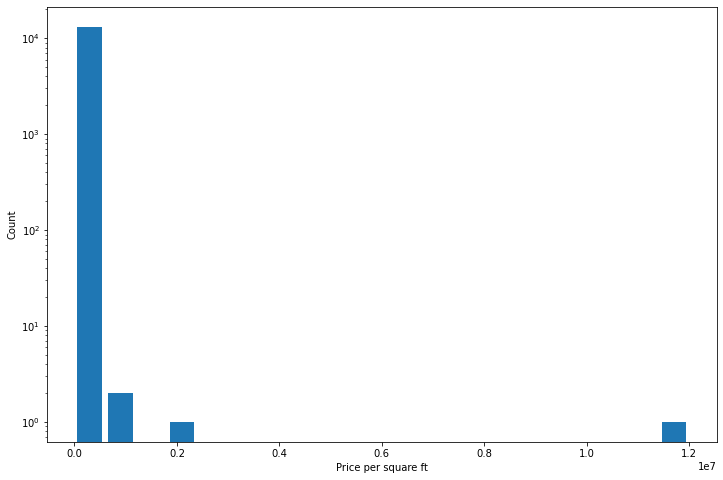

In [8]:
### Now we see better visualization in log
plt.hist(df.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [10]:
## Traet outliers using percentile first
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [11]:
outliers = df[(df.price_per_sqft>upper_limit)|(df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
1005,other,1 BHK,15.0,1.0,30.0,1,200000
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250


In [23]:
### remove 28 outliers
outliers.shape[0]

28

In [18]:
## Remove the outliers
df2 = df[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]

In [19]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [20]:
df2.shape

(13172, 7)

In [22]:
df.shape[0] - df2.shape[0]

28

### Removing outliers using 4 standard daviation

In [25]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [30]:
df2[(df2.price_per_sqft > max_limit)].head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
849,other,4 Bedroom,2400.0,4.0,640.0,4,26666
978,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571
1078,other,4 Bedroom,2400.0,5.0,775.0,4,32291
1281,Chamrajpet,9 Bedroom,4050.0,7.0,1200.0,9,29629
1548,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5,50000


In [35]:
df2[(df2.price_per_sqft<min_limit)].sample

<bound method NDFrame.sample of Empty DataFrame
Columns: [location, size, total_sqft, bath, price, bhk, price_per_sqft]
Index: []>

In [36]:
df3 = df2[(df2.price_per_sqft> min_limit) & (df2.price_per_sqft<max_limit)]

In [37]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [38]:
df3.shape

(13047, 7)

In [40]:
## we have remove 125 outliers by using 4 standard daviation method
df2.shape[0] - df3.shape[0]

125

### Visualize the data

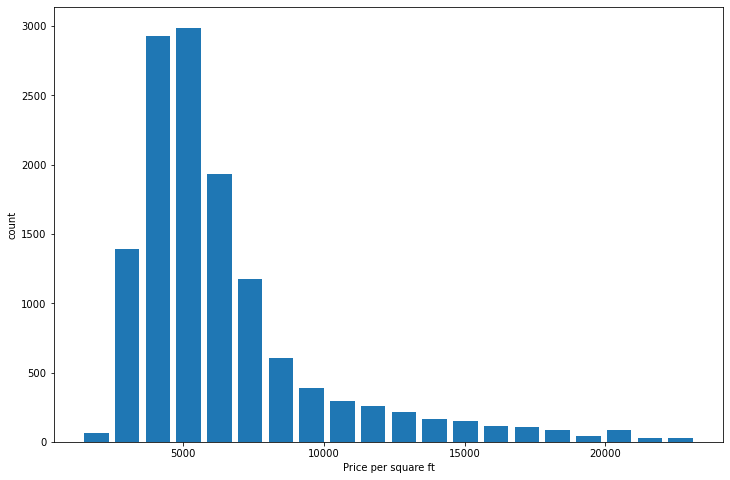

In [41]:
plt.hist(df3.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel('count')
plt.show()

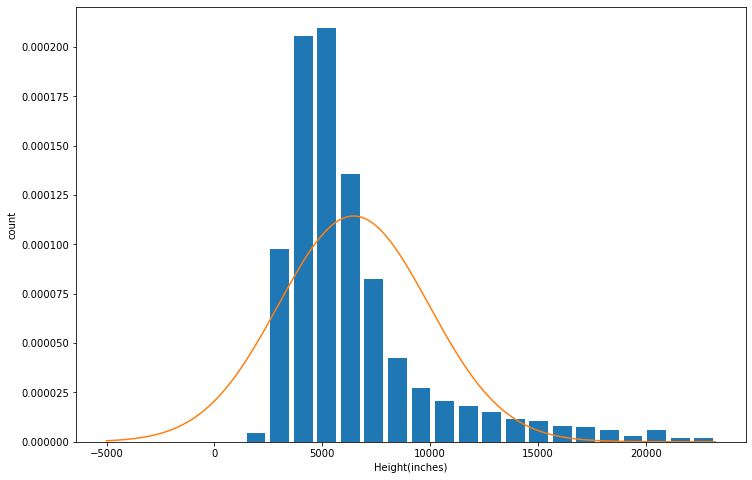

In [44]:
from scipy.stats import norm
import numpy as np
plt.hist(df3.price_per_sqft, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('Height(inches)')
plt.ylabel('count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))


## Removing outliers using z score method 

### find z score vale z-score = [(x -  μ)/σ]

### where x = price per square ft value,   μ = mean value of price per square ft, and σ = standard daviation value of price per square ft.

In [46]:
df2['z-score'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.head(10)

C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247,-0.825075
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467,0.193997
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181,2.781282
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828,-0.443285
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274,7.150495


In [50]:
outliers_z = df2[(df2['z-score']<-4)| (df2['z-score']>4)]
outliers_z.shape

(125, 8)

In [52]:
outliers_z.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
12607,HAL 2nd Stage,8 Bedroom,1000.0,7.0,260.0,8,26000,4.669464
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
12671,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
3675,Kasturi Nagar,5 Bedroom,1650.0,5.0,450.0,5,27272,4.976634
6135,other,3 Bedroom,4273.0,3.0,1100.0,3,25743,4.607402
12393,Electronic City Phase II,1 BHK,1200.0,1.0,295.0,1,24583,4.327278
5909,other,5 Bedroom,1240.0,5.0,300.0,5,24193,4.233098
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283


In [53]:
df4 = df2[(df2['z-score']>-4)&(df2['z-score']<4)]

In [54]:
df4.shape

(13047, 8)

In [55]:
df2.shape[0] - df4.shape[0]

125

In [56]:
df4.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
